### Шмидт Ян, 304 гр., 2023, Вариант 9

Из условия: $$\xi = \dfrac{1}{11}, \quad A = \dfrac{1}{15}, \quad B = \dfrac{1}{25}$$
Система ОДУ:
$$\dfrac{dy_1(x)}{dx}=Ay_2(x)\\ \dfrac{dy_2(x)}{dx}=-By_1(x)$$
Начальные данные: $$x_0 = 0\\ y_1(x_0)=B\pi\\ y_2(x_0)=A\pi$$
Такой вопрос: $$x_k = \pi\\ y_1(x_k) = ?\\ y_2(x_k) = ?$$

# Часть 1. Расчетные схемы метода Рунге-Кутты с постоянным шагом

### Определение локальной (методической) погрешности. Как производится выбор $b_i, c_i, a_{ij}$?

![image](./images/ЯМРК-теория2.png)

### Обобщение метода Рунге-Кутты на случай систем ОДУ

![image](./images/ODEsystem.png)

## Часть 1.1. Построить 2х-этапного ЯМРК 2-го порядка при значении параметра $c=\xi$ (параметр $\xi$ указан в варианте).

In [11]:
import numpy as np
import matplotlib.pyplot as plt

### Посчитаем необходимые величины и коэффициенты

In [12]:
xi, A, B = 1/11, 1/15, 1/25

x0 = 0
pi = np.pi
xk = pi

N = 2
nodes = np.linspace(x0, xk, N)
h = (xk - x0) / len(nodes)
print(f'Число узлов разбиения: {N}, \nвеличина постоянного шага h: {h}')

c2 = xi
a21 = c2
b1 = 1 - 1/(2*c2)
b2 = 1/(2*c2)
print(f'\nДля двухэтапного метода Рунге-Кутты: \nc2 = {c2}, \na21 = {a21}, \nb1 = {b1}, \nb2 = {b2}')

Число узлов разбиения: 2, 
величина постоянного шага h: 1.5707963267948966

Для двухэтапного метода Рунге-Кутты: 
c2 = 0.09090909090909091, 
a21 = 0.09090909090909091, 
b1 = -4.5, 
b2 = 5.5


### Точное решение задачи Коши через Maple

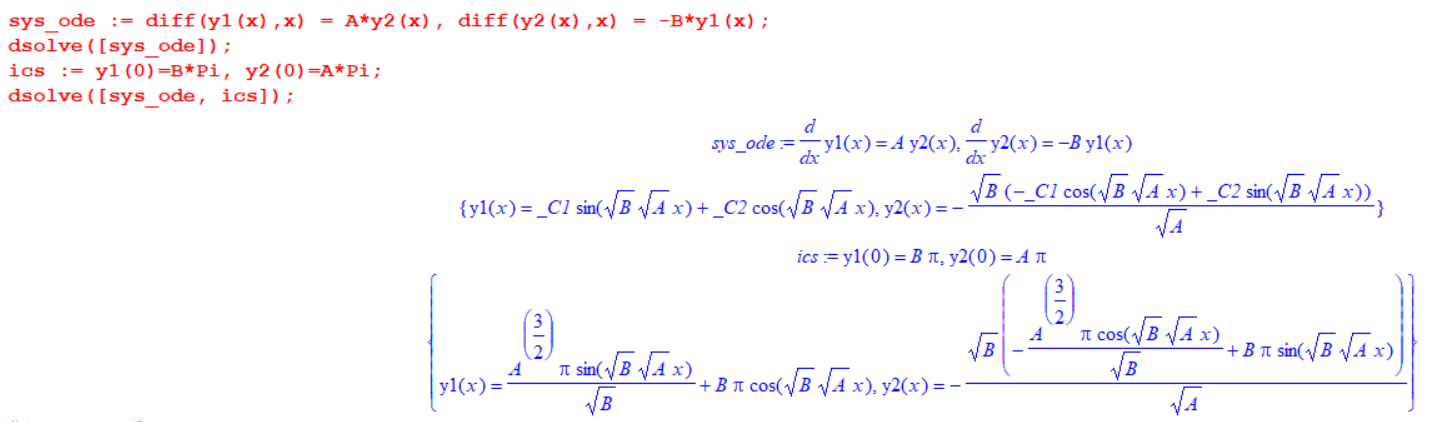

In [13]:
def y1(x):
    srt = np.sqrt(A*B)
    return ((A**(3/2))*pi*np.sin(srt*x)) / np.sqrt(B) + B*pi*np.cos(srt*x)

def y2(x):
    srt = np.sqrt(A*B)
    return (-1)*(np.sqrt(B/A))*(-(A**(3/2))*pi*np.cos(srt*x) / np.sqrt(B) + B*pi*np.sin(srt*x))

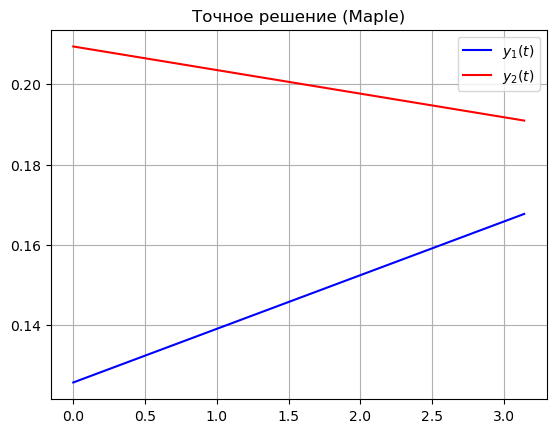

In [14]:
plt.plot(nodes, y1(nodes), color='b', label='$y_1(t)$')
plt.plot(nodes, y2(nodes), color='r', label='$y_2(t)$')

plt.grid()
plt.title('Точное решение (Maple)')
plt.legend()
plt.show()

$y_i(x_k) = y_i(\pi) = ? \quad (i=\overline{1,2})$

In [15]:
print(f'Точное решение поставленной задачи Коши: \ny_1(x_k) = {y1(pi)}, \ny_2(x_k) = {y2(pi)}')

Точное решение поставленной задачи Коши: 
y_1(x_k) = 0.16768641025029876, 
y_2(x_k) = 0.19096724683765257


### Точное решение задачи Коши через scipy

In [7]:
from scipy.integrate import odeint  # for comparison

### Графики решений

Система ОДУ:
$$y'_1(x)=Ay_2(x)\\ y'_2(x)=-By_1(x)$$
Начальные данные: $$x_0 = 0\\ y_1(x_0)=B\pi\\ y_2(x_0)=A\pi$$

В векторном виде:
Если $y=[y_1(x), y_2(x)]$, то получим уравнение $y'=f(t, y)$, где $f(t,y)=[Ay[1], -By[0]]$

In [31]:
# def SODE(y, t):
#     A = 1/15
#     B = 1/25
#     return np.array([A*y[1], -B*y[0]])

In [51]:
def SODE(y, t):
    A = 1/15
    B = 1/25
    
    y1 = A*y[1]
    y2 = -B*y[0]
    
    ans = [y1, y2]
    
    return np.array(ans)

In [52]:
y0 = np.array([B*pi, A*pi])

In [53]:
y0

array([0.12566371, 0.20943951])

$\texttt{odeint}$ решит нашу СОДУ при $t\in[0,\pi]$ с $N$ разбиениями — постоянные шаги

In [54]:
t = np.linspace(0, pi, N*10)
sol_true = odeint(SODE, y0, t)

In [55]:
y1_xk_true = sol_true[len(t) - 1][0]
y2_xk_true = sol_true[len(t) - 1][1]

In [56]:
print(f'\nf1(xk): {y1_xk_true}')
print(f'f2(xk): {y2_xk_true}')


f1(xk): 0.16768642597397546
f2(xk): 0.1909672446005208


### Таким образом, получаем точное решение поставленной задачи Коши в точке $x_k$. 
$$y_1(x_k) = 0.16768642597397546,\quad y_2(x_k) = 0.1909672446005208$$

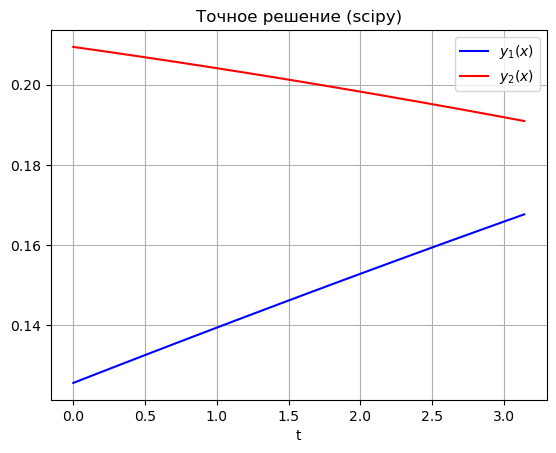

In [57]:
plt.plot(t, sol_true[:, 0], color='b', label=r'$y_1(x)$')
plt.plot(t, sol_true[:, 1], color='r', label=r'$y_2(x)$')

plt.legend(loc='best')
plt.xlabel('t')
plt.title('Точное решение (scipy)')
plt.grid()
plt.show()

### ЯМРК 2 порядка с постоянным шагом

In [61]:
def rungekutta2(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        
        k1 = h*f(y[i], t[i])
        k2 = h*f(y[i] + a21*k1, t[i] + c2*h)

        y[i+1] = y[i] + b1*k1 + b2*k2
    return y

In [62]:
t = np.linspace(0, pi, N*10)
sol_2 = rungekutta2(SODE, y0, t)

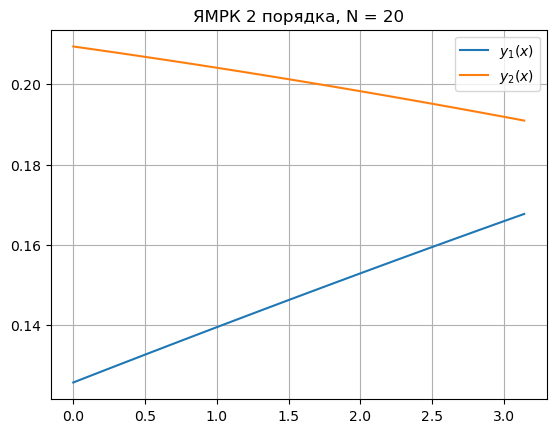

In [63]:
plt.plot(t, sol_2[:, 0], label='$y_1(x)$')
plt.plot(t, sol_2[:, 1], label='$y_2(x)$')

plt.title(f'ЯМРК 2 порядка, N = {N*10}')
plt.legend(loc='best')
plt.grid()
plt.show()

## Часть 1.2. Решение задачи Коши с заданной точностью ($\varepsilon = 10e^{-4}$) с постоянным шагом интегрирования и оценкой полной погрешности по методу Рунге. Начальный шаг выбирать согласно алгоритму выбора начального шага (стр. 15 методического пособия).

In [241]:
def rungekutta2_runge_diff(f, y0, t, args=()):
    """Функция, решающая задачу Коши с заданной наперед точностью.
    Полная погрешность считается по методу Рунге
    """
    n = len(t)
    y_overline = np.zeros((n, len(y0)))
    y_tilde = np.zeros((n, len(y0)))
    s = 2
    
    y_overline[0] = y0
    y_tilde[0] = y0
    j = 1

    for i in range(n - 1): 
        """Здесь вычисляется приближенное решение 
        на сетке с шагом h_i — иными словами, вычисляем
        y с чертой"""
        h = t[i+1] - t[i]
        k11 = h*f(y_overline[i], t[i], *args)
        k21 = h*f(y_overline[i] + a21*k11, t[i] + c2*h, *args)

        y_overline[i+1] = y_overline[i] + b1*k11 + b2*k21

        """Здесь вычисляется приближенное решение 
        на сетке с шагом 0.5 * h_i — иными словами, вычисляем
        y с волной"""
        h = (t[i+1] - t[i]) / 2
        k12 = h*f(y_tilde[i], t[i], *args)
        k22 = h*f(y_tilde[i] + a21*k12, t[i] + c2*h, *args)

        y_tilde[i+1] = y_tilde[i] + b1*k12 + b2*k22
        
        j += 1

    print(f'times calculated: {j}')
    return y_overline, y_tilde

times calculated: 20


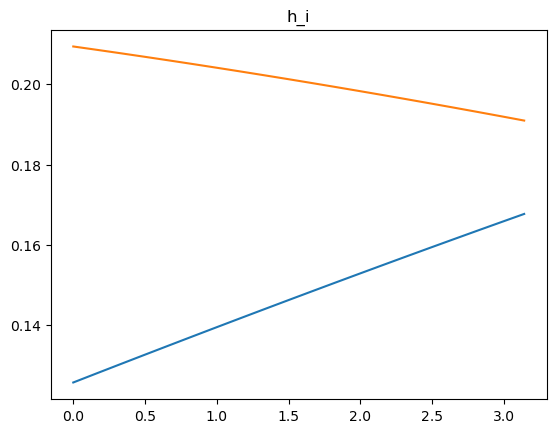

times calculated: 20


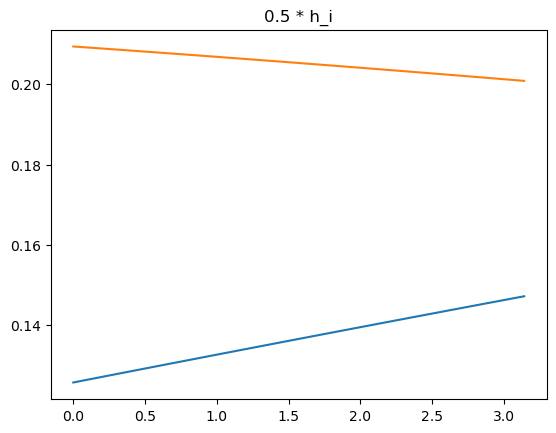

In [242]:
plt.plot(t, rungekutta2_runge_diff(SODE, y0, t, args=(A, B))[0])
plt.title('h_i')
plt.show()

plt.plot(t, rungekutta2_runge_diff(SODE, y0, t, args=(A, B))[1])
plt.title('0.5 * h_i')
plt.show()

# Часть 2. Расчетные схемы метода Рунге-Кутты с автоматическим выбором шага

## Часть 2.1. Решение задачи Коши на базе построенного в части  1.1 ЯМРК 2-го порядка с автоматическим выбором шага с заданной максимально допустимой локальной погрешностью ($\rho=10e^{-5}$) и оценкой локальной погрешности по методу Рунге. Начальный шаг выбирать так же, как и в части 1

### ЯМРК 2 порядка с автоматическим выбором шага

In [ ]:
def rungekutta2_auto(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = h*f(y[i], t[i], *args)
        k2 = h*f(y[i] + a21*k1, t[i] + c2*h, *args)

        y[i+1] = y[i] + b1*k1 + b2*k2
    return y

In [72]:
print(f'\n|true solution - runge-kutta 2|:\n {sol_2 - sol_true}\n\
      \n|true solution - runge-kutta 4|:\n {sol_4 - sol_true}')


|true solution - runge-kutta 2|:
 [[ 0.00000000e+00  0.00000000e+00]
 [ 3.54674676e-08 -1.28871619e-08]
 [ 7.15027789e-08 -2.65635806e-08]
 [ 9.39793791e-08 -3.59949548e-08]
 [ 1.03156672e-07 -4.15583396e-08]
 [ 1.24763901e-07 -5.15156627e-08]
 [ 1.51156051e-07 -6.41155075e-08]
 [ 1.77316573e-07 -7.70051580e-08]
 [ 2.03325786e-07 -9.00422015e-08]
 [ 2.28771552e-07 -1.03846657e-07]
 [ 2.53995202e-07 -1.17911935e-07]
 [ 2.79204226e-07 -1.31929260e-07]
 [ 3.04086124e-07 -1.46342434e-07]
 [ 3.28742509e-07 -1.60893401e-07]
 [ 3.53054725e-07 -1.75679885e-07]
 [ 3.77227793e-07 -1.90474461e-07]
 [ 4.01259072e-07 -2.05429934e-07]
 [ 4.25012367e-07 -2.20921758e-07]
 [ 4.48727085e-07 -2.36257201e-07]
 [ 4.72372410e-07 -2.51392791e-07]]
      
|true solution - runge-kutta 4|:
 [[ 0.00000000e+00  0.00000000e+00]
 [ 7.44266368e-09 -2.74182937e-09]
 [ 1.56788796e-08 -5.90295202e-09]
 [ 1.05881977e-08 -4.45132622e-09]
 [-7.56390711e-09  1.23367988e-09]
 [-1.30421537e-08  2.88777191e-09]
 [-1.34855550

# Часть 3. Анализ эффективности методов Рунге-Кутты

## Часть 3.1. Решение задачи Коши с постоянным и автоматическим выбором шага на базе ЯМРК 4 порядка

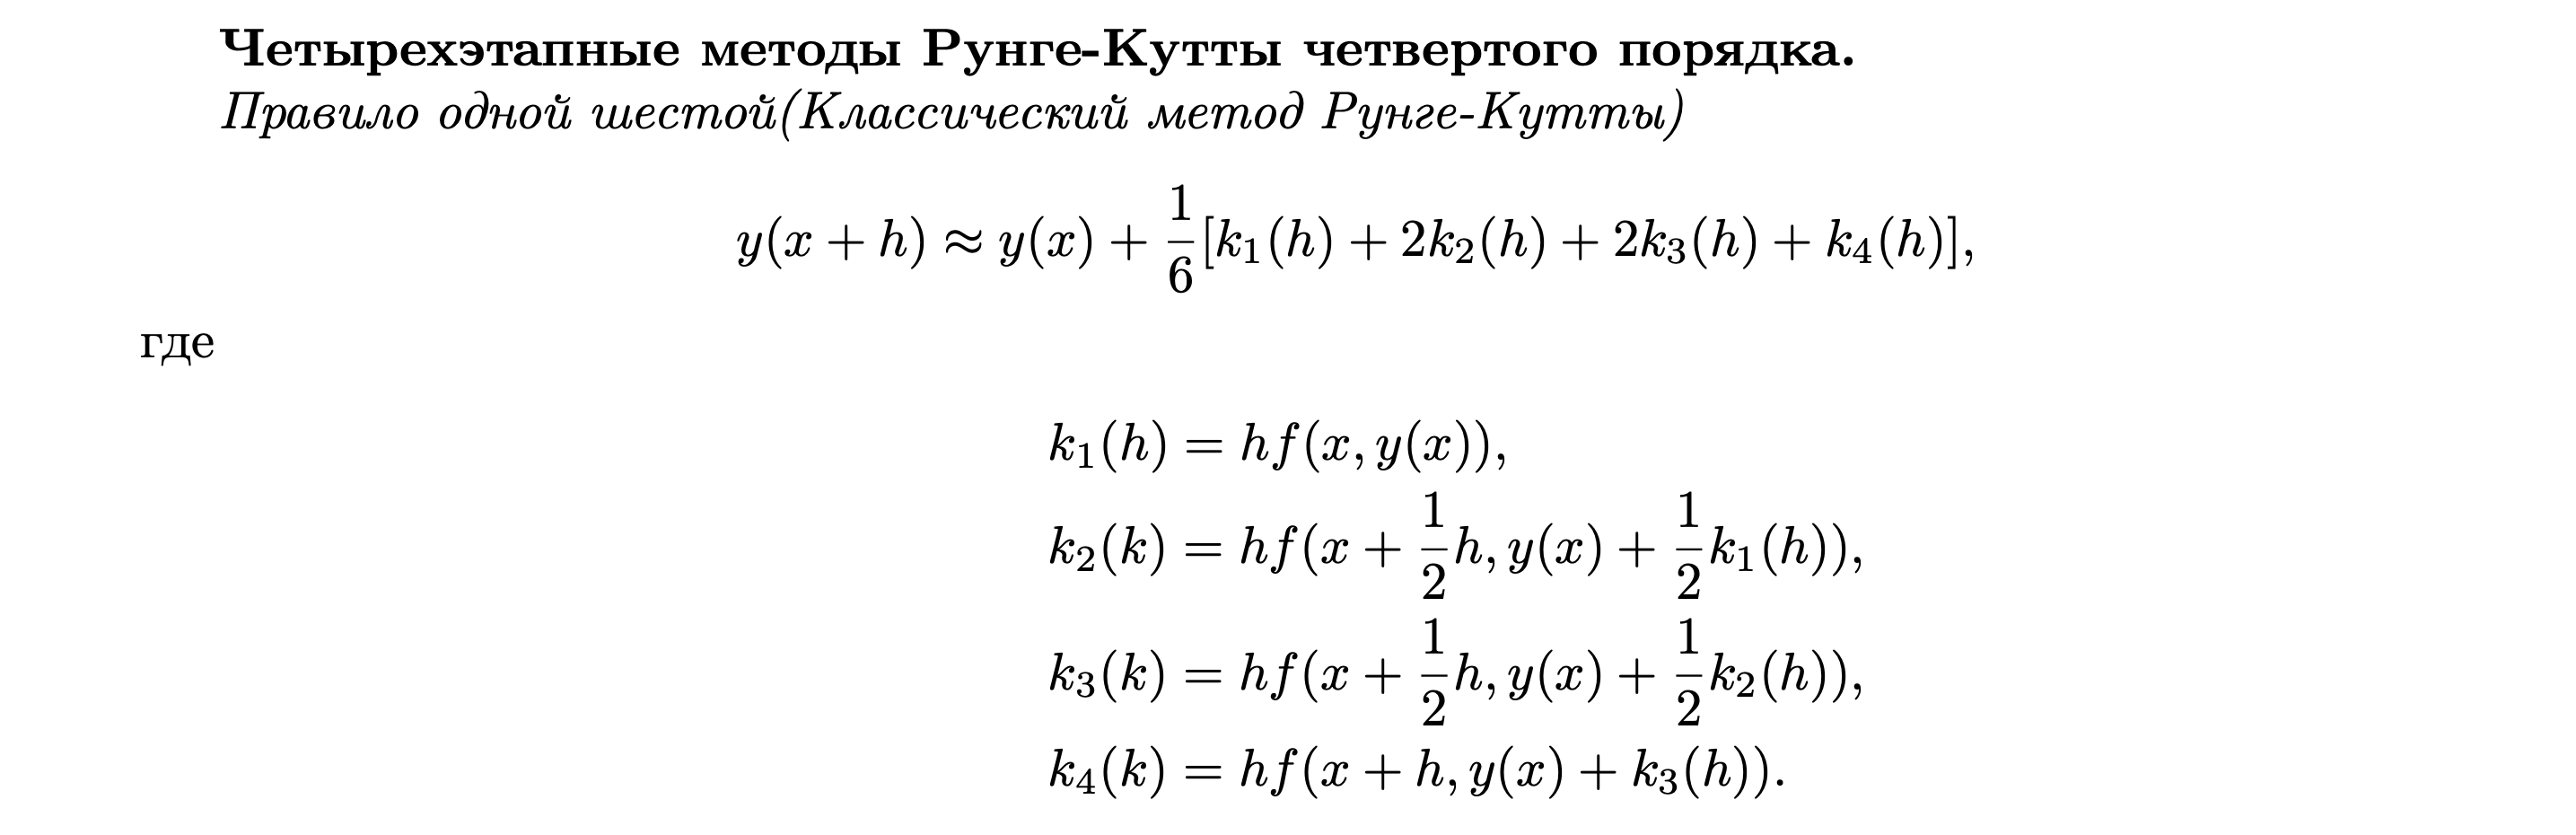

### ЯРМК 4 порядка с постоянным шагом

In [60]:
def rungekutta4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1*h/2., t[i] + h/2., *args)
        k3 = f(y[i] + k2*h/2., t[i] + h/2., *args)
        k4 = f(y[i] + k3*h, t[i] + h, *args)
        y[i+1] = y[i] + (h/6.)*(k1 + 2*k2 + 2*k3 + k4)
    return y

In [61]:
t = np.linspace(0, pi, N*10)
sol_4 = rungekutta4(SODE, y0, t, args=(A, B))

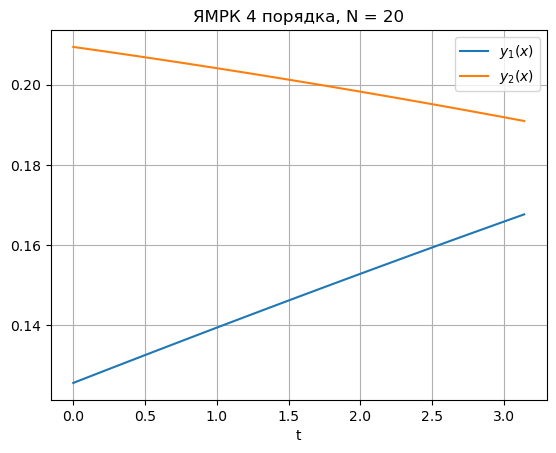

In [62]:
plt.plot(t, sol_4[:, 0], label='$y_1(x)$')
plt.plot(t, sol_4[:, 1], label='$y_2(x)$')

plt.legend(loc='best')
plt.xlabel('t')
plt.title(f'ЯМРК 4 порядка, N = {N*10}')
plt.grid()
plt.show()

<!-- ### 4х-этапный метод Рунге-Кутты 4-го порядка — классический метод Рунге-Кутты, или правило одной шестой
![image](./images/КлассичМетодРК.png) -->

## Часть 3.2. Для выбранного метода (схемы оппонента) из части 3.1 и реализованного Вами в части 1.2 2х-этапного ЯМРК 2-го порядка для решения задачи Коши с постоянным шагом определите величину шага интегрирования $h$, обеспечивающего вычисление приближенного решения с заданной точностью ($\varepsilon = 10^{-4}$). Постройте графики зависимости истинной полной погрешности от значения независимой переменной $x$ при интегрировании с полученным шагом $h$.

### Посчитаем полную погрешность

In [81]:
RK2_y1_diff, RK2_y2_diff = [], []
for i, j in (abs(sol_2 - sol_true)):
    RK2_y1_diff.append(i)
    RK2_y2_diff.append(j)
    
RK4_y1_diff, RK4_y2_diff = [], []
for i, j in (abs(sol_4 - sol_true)):
    RK4_y1_diff.append(i)
    RK4_y2_diff.append(j)

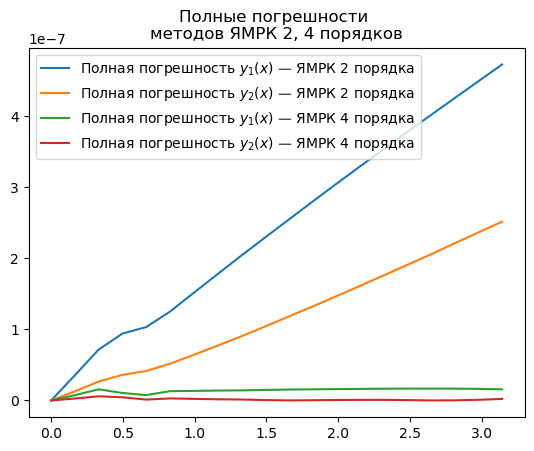

In [107]:
plt.plot(t, RK2_y1_diff, label='Полная погрешность $y_1(x)$ — ЯМРК 2 порядка')
plt.plot(t, RK2_y2_diff, label='Полная погрешность $y_2(x)$ — ЯМРК 2 порядка')

plt.plot(t, RK4_y1_diff, label='Полная погрешность $y_1(x)$ — ЯМРК 4 порядка')
plt.plot(t, RK4_y2_diff, label='Полная погрешность $y_2(x)$ — ЯМРК 4 порядка')

plt.legend(loc='best')
plt.title('Полные погрешности \nметодов ЯМРК 2, 4 порядков')
plt.show()

## Часть 3.3. Для схемы оппонента из части 3.1 и реализованного Вами в части 2.1 2х этапного ЯМРК 2-го порядка для решения задачи Коши с автоматическим выбором шага интегрирования постройте:

### Часть 3.3.1 графики зависимости величины шага интегрирования от значения независимой переменной $x$

### Часть 3.3.2 графики зависимости отношения истинной локальной погрешности к полученной оценке локальной погрешности от значения независимой переменной $x$ (см. формулу (91) в методичке).

### Формула (91): $$\xi_{j+1}^\varepsilon = \dfrac{|l_{j+1}|}{|\rho_{j+1}|}$$

TODO: переписать формулу

### Часть 3.3.3 графики зависимости количества вычислений правой части системы от заданной точности $\varepsilon$ (например, $\varepsilon = [10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}, 10^{-5}]$).